<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Split-data" data-toc-modified-id="Split-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Split data</a></span></li><li><span><a href="#Train-data" data-toc-modified-id="Train-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train data</a></span></li><li><span><a href="#Intercept-&amp;-coefficient" data-toc-modified-id="Intercept-&amp;-coefficient-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Intercept &amp; coefficient</a></span></li><li><span><a href="#Testing-the-model:-prediction" data-toc-modified-id="Testing-the-model:-prediction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the model: prediction</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Accuracy,-Precision,-Recall-&amp;-F1Score" data-toc-modified-id="Accuracy,-Precision,-Recall-&amp;-F1Score-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Accuracy, Precision, Recall &amp; F1Score</a></span></li><li><span><a href="#Receiver-Operating-Characteristic-(ROC)-Curve" data-toc-modified-id="Receiver-Operating-Characteristic-(ROC)-Curve-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Receiver Operating Characteristic (ROC) Curve</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-ROC-and-Finding-the-Area-Under-the-Curve-(AUC)" data-toc-modified-id="Plotting-the-ROC-and-Finding-the-Area-Under-the-Curve-(AUC)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Plotting the ROC and Finding the Area Under the Curve (AUC)</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#   Split data

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
cancer.data, # features
cancer.target, # labels
test_size = 0.25, # split ratio
random_state = 1, # set random seed
stratify = cancer.target) # randomize based on labels


# Train data

In [5]:
from sklearn import linear_model
x = train_set[:,0:30] # all 30 features
y = train_labels # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,
y = y)

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Intercept & coefficient

In [6]:
print(log_regress.intercept_) 
print(log_regress.coef_)

[0.10454441]
[[ 0.59396857  0.52535329  0.51420325 -0.03168248 -0.0164435  -0.09248078
  -0.13107337 -0.0519281  -0.03020603 -0.00439707  0.02766815  0.14187445
   0.0288671  -0.10828961 -0.00145443 -0.02181675 -0.02988913 -0.00695528
  -0.00567133 -0.0020866   0.68780437 -0.57458147 -0.31409314 -0.00622161
  -0.03322475 -0.31273276 -0.39371778 -0.1061693  -0.08981477 -0.02924339]]


# Testing the model: prediction

In [7]:
import pandas as pd
#get the predicted probablities and convert into a dataframe
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))
#assign column names to prediction
preds_prob.columns = ["Malignant", "Benign"]
#get the predicted class labels
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]
#actual diagnosis
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]
#merge the three dataframes into one
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant        Benign  Prediction  Original Result
0   0.999819  1.806293e-04           0                0
1   0.999681  3.188900e-04           0                0
2   0.165953  8.340469e-01           1                1
3   1.000000  7.170901e-09           0                0
4   0.090603  9.093973e-01           1                0


# Confusion matrix

In [8]:
#generate table of predictions vs actual
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


In [9]:
from sklearn import metrics
#view the confusion matrix using confusion_matrix() function
print(metrics.confusion_matrix(y_true = test_labels, # True labels
y_pred = preds)) # Predicted labels

[[48  5]
 [ 4 86]]


# Accuracy, Precision, Recall & F1Score

In [10]:
# get the accuracy of the prediction
print("---Accuracy---")
print(log_regress.score(X = test_set ,
y = test_labels))

---Accuracy---
0.9370629370629371


In [11]:
#Precision, recall, and F1-score
#View summary of common classification metrics
print("---Metrics---")
print(metrics.classification_report(
y_true = test_labels,
y_pred = preds))

---Metrics---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Receiver Operating Characteristic (ROC) Curve

## Plotting the ROC and Finding the Area Under the Curve (AUC)

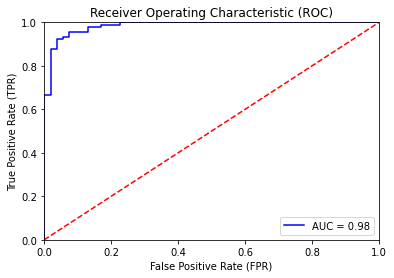

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc

#find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set)
preds = probs[:,1]

#find the FPR, TPR, and threshold
fpr, tpr, threshold = roc_curve(test_labels, preds)

#find the area under the curve
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

# Conclusion
We have built a supervised machine learning algorithm- Logistic Regression based on breast cancer dataset. The logistic regression model accurately predict if tumor is benign or malignant with excellent performance ( good recall and precision metrics).